In [ ]:
!pip install gdown

In [ ]:
!gdown 1gMGEicXgakRxHomKeTRZuN12VSaJfN7R

Downloading...
From: https://drive.google.com/uc?id=1gMGEicXgakRxHomKeTRZuN12VSaJfN7R
To: /content/amazon_final2.csv
100% 73.3M/73.3M [00:02<00:00, 31.8MB/s]


#Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file

In [ ]:
df = pd.read_csv('amazon_final2.csv')

# Display basic information about the dataset

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588607 entries, 0 to 588606
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   product_name         588607 non-null  object 
 1   main_category        588607 non-null  object 
 2   sub_category         588607 non-null  object 
 3   ratings              588607 non-null  float64
 4   no_of_ratings        588607 non-null  int64  
 5   discount_price       588607 non-null  int64  
 6   actual_price         588607 non-null  int64  
 7   company              588607 non-null  object 
 8   discount_percentage  588604 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 40.4+ MB
None


# Task 1 Average Discount, Highest Discount, and Discount in Sub-Category : ->Task: Calculate average discount, find the highest discount, and plot discount distribution in sub-categories.


Highest and average discount Based on Subcategories only

In [ ]:
average_discount = df['discount_percentage'].mean().round(2)
print("Average Discount:",average_discount)

highest_discount = df['discount_percentage'].max().round(2)
print("Highest Discount:",highest_discount)

subcategory_stats = df.groupby('sub_category').agg({'discount_percentage': ['mean', 'max']}).reset_index()
subcategory_stats.columns = ['sub_category', 'average_discount', 'highest_discount']

subcategory_stats

Average Discount: 46.59
Highest Discount: 100.0


,sub_category,average_discount,highest_discount
0,Air Conditioners,64.167160,99.12
1,All Appliances,55.862670,99.97
2,All Car & Motorbike Products,48.252691,99.74
3,All Electronics,45.428607,100.00
4,All Exercise & Fitness,44.736986,99.83
...,...,...,...
107,Washing Machines,59.461613,99.77
108,Watches,39.828510,99.99
109,Western Wear,38.888496,99.96
110,Women's Fashion,38.436829,100.00


Highest and average discount Based on main catgory

In [ ]:
category_stats = df.groupby('main_category').agg({'discount_percentage': ['mean', 'max']}).reset_index()

category_stats.columns = ['main_category', 'average_discount', 'highest_discount']

print("Discount Statistics by Main Category:")
print(category_stats)

average_discount = df['discount_percentage'].mean().round(2)
print("Average Discount:",average_discount)

highest_discount = df['discount_percentage'].max().round(2)
print("Highest Discount:",highest_discount)


Discount Statistics by Main Category:
              main_category  average_discount  highest_discount
0               accessories         44.857818            100.00
1                appliances         57.456174            100.00
2            bags & luggage         44.630513            100.00
3           beauty & health         57.441121            100.00
4           car & motorbike         48.969624             99.98
5   grocery & gourmet foods         59.751198            100.00
6            home & kitchen         49.175602             99.95
7       home, kitchen, pets         73.112857             91.94
8       industrial supplies         54.175944            100.00
9             kids' fashion         51.061446            100.00
10           men's clothing         48.103308            100.00
11              men's shoes         49.312296            100.00
12                    music         54.477556            100.00
13             pet supplies         55.764233             99.87
14

#Task 2: Highest Rated Product with Number of Ratings and Rating based on subcategory

In [ ]:
df['score'] = df['ratings'] * df['no_of_ratings']

best_products = df.loc[df.groupby('sub_category')['score'].idxmax()]

print("Highest Rated Products by Sub-Category:")
for _, product in best_products.iterrows():
    print(f"\nSub-Category: {product['sub_category']}")
    print(f"Product: {product['product_name']}")
    print(f"Rating: {product['ratings']}")
    print(f"Number of Ratings: {product['no_of_ratings']}")
    print(f"Score: {product['score']:.2f}")

Highest Rated Products by Sub-Category:

Sub-Category: Air Conditioners
Product: Ontel Arctic Air Freedom Portable Personal Air Cooler, Small
Rating: 3.8
Number of Ratings: 9577
Score: 36392.60

Sub-Category: All Appliances
Product: Pigeon Polypropylene Mini Handy and Compact Chopper with 3 Blades for Effortlessly Chopping Vegetables and Fruits for Your...
Rating: 4.1
Number of Ratings: 274505
Score: 1125470.50

Sub-Category: All Car & Motorbike Products
Product: SOFTSPUN Microfiber Cloth - 4 pcs - 40x40 cms - 340 GSM Grey- Thick Lint & Streak-Free Multipurpose Cloths - Automotive Mi...
Rating: 4.3
Number of Ratings: 78970
Score: 339571.00

Sub-Category: All Electronics
Product: Amazon Basics High-Speed HDMI Cable, 6 Feet - Supports Ethernet, 3D, 4K video,Black
Rating: 4.4
Number of Ratings: 437651
Score: 1925664.40

Sub-Category: All Exercise & Fitness
Product: AmazonBasics 13mm Extra Thick Yoga and Exercise Mat with Carrying Strap, Purple
Rating: 4.2
Number of Ratings: 74871
Score: 3

In [ ]:
def top_rated_product(group):
    max_rating = group['ratings'].max()
    highest_rated = group[group['ratings'] == max_rating]
    return highest_rated.loc[highest_rated['no_of_ratings'].idxmax()]

top_products = df.groupby('sub_category').apply(top_rated_product).reset_index(drop=True)

print("Top Rated Products by Sub-Category:")
for _, product in top_products.iterrows():
    print(f"\nSub-Category: {product['sub_category']}")
    print(f"Product: {product['product_name']}")
    print(f"Rating: {product['ratings']}")
    print(f"Number of Ratings: {product['no_of_ratings']}")

Top Rated Products by Sub-Category:

Sub-Category: Air Conditioners
Product: LG 1 Ton 3 Star Split Dual Inverter AC - White (MS-Q12ENXA, Copper Condenser)
Rating: 5.0
Number of Ratings: 5

Sub-Category: All Appliances
Product: COROID-Table Fan High Speed, Powerful Rechargeable 1.5 Watts Table Fan with 21 SMD LED Light, Table Fan for Home, Office D...
Rating: 5.0
Number of Ratings: 78

Sub-Category: All Car & Motorbike Products
Product: Motor Headz - Microfiber 1200 GSM - Vehicle Cleaning Towels (Set of 3, Black with Red Border)
Rating: 5.0
Number of Ratings: 12

Sub-Category: All Electronics
Product: FUR JADEN Faux Leather 15.6 Inch Premium Laptop Backpack 32L with Internal Organizer, 2 Large Compartments
Rating: 5.0
Number of Ratings: 50

Sub-Category: All Exercise & Fitness
Product: LUHI Grid Foam Roller for exercise Large Size Foam Roller Kit with Muscle Roller Stick High Density for Physical Therapy,D...
Rating: 5.0
Number of Ratings: 27

Sub-Category: All Grocery & Gourmet Foods
P

Highest Rated Product with Number of Ratings and Rating based on Company

In [ ]:
def top_rated_product(group):
    max_rating = group['ratings'].max()
    highest_rated = group[group['ratings'] == max_rating]
    return highest_rated.loc[highest_rated['no_of_ratings'].idxmax()]

top_products = df.groupby('company').apply(top_rated_product).reset_index(drop=True)

print("Top Rated Products by Company:")
for _, product in top_products.iterrows():
    print(f"\nCompany: {product['company']}")
    print(f"Product: {product['product_name']}")
    print(f"Rating: {product['ratings']}")
    print(f"Number of Ratings: {product['no_of_ratings']}")

Streaming output truncated to the last 5000 lines.

Company: lenovo
Product: lenovo 65w ac adapter with usb type c connector (3 prong power cord) for Laptops, p51s - Black
Rating: 4.3
Number of Ratings: 611

Company: leqingchun
Product: leqingchun Clip-on Headphones, subwoofer Stereo Wired Headphones, Compatible with 3.5mm Interface Device, with Microphone（...
Rating: 4.0
Number of Ratings: 120

Company: libzu
Product: libzu Women's Satin Embroidered Semi-stitched Lehenga Choli
Rating: 5.0
Number of Ratings: 1

Company: life
Product: life dream Winter Wear Cotton High Neck Full Sleeves T-Shirt Winter Wear Cotton Plain Full Sleeve Turtle Neck T Shirt for ...
Rating: 5.0
Number of Ratings: 1

Company: life's
Product: life's long Sweden Milk and Honey Gold Sugar Scrub, 200ml
Rating: 4.3
Number of Ratings: 2161

Company: ligent
Product: ligent Heating Thermal Underwear Set 8-Zone USB Electric Heated Suit Support APP Control 5-Level Temperature Adjustment fo...
Rating: -1.0
Number of Rating

Analyzing top rated products from it by help of products score

In [ ]:
top_products = top_products.sort_values('score', ascending=False)
top_10 = top_products.head(10)

print("Top 10 Rated Products:")
for _, product in top_10.iterrows():
    print("\nSub-Category:", product['sub_category'])
    print("Product:", product['product_name'])
    print("Rating:", product['ratings'])
    print("Number of Ratings:", product['no_of_ratings'])

Top 10 Rated Products:

Sub-Category: Value Bazaar
Product: MYFITNESS Chocolate Peanut Butter Smooth 1250g
Rating: 4.6
Number of Ratings: 40049

Sub-Category: Toys Gifting Store
Product: Funskool Plastic Stacking Multicolored Cubes, Blocks With Alphabet, Helps To Sort, Stack And Nest, 12 Months & Above, Infa...
Rating: 4.5
Number of Ratings: 6412

Sub-Category: STEM Toys Store
Product: Melissa & Doug Self-Correcting Number Puzzles (Developmental Toys, Wooden Storage Box, Matching & Counting Skill Developme...
Rating: 4.7
Number of Ratings: 4041

Sub-Category: International Toy Store
Product: Ravensburger Puzzles No Dogs on The Beach, Multi Color (100 Pieces)
Rating: 4.9
Number of Ratings: 1012

Sub-Category: Toys & Games
Product: FIGMENT Dancing Cactus Talking Toy, Cactus Plush Toy, Wriggle & Singing Recording Repeat What You Say Funny Education Toys...
Rating: 5.0
Number of Ratings: 99

Sub-Category: Health & Personal Care
Product: RAWLS Hydrating Under Eye Cream Gel/Enriched with Alo

#Task 3 Discount vs Rating : ->Task: Plot the relationship between discounts and ratings.

<Axes: xlabel='ratings', ylabel='discount_percentage'>

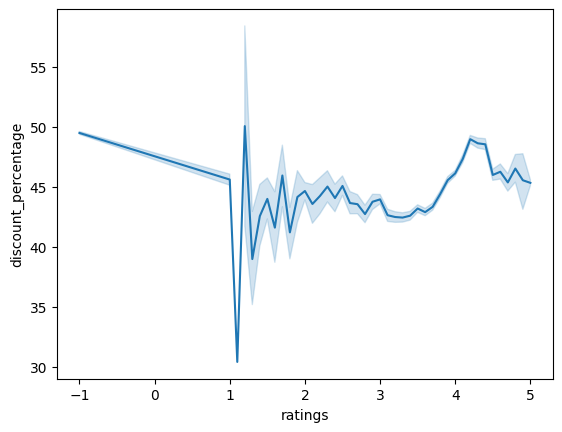

In [ ]:
discount = df["discount_percentage"]
ratings = df["ratings"]
sns.lineplot(x=ratings,y=discount)